In [1]:
import os
import shutil

import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
from PIL import Image

from acyclic_directed_graph.confidence_with_dg import confidence_map as acyclic_cm
from karamalis_confidence_map.confidence_monai import UltrasoundConfidenceMap as karamalis_cm

In [2]:
cm_paths_liver = {
    "all": "data/CMS/cms_all_liver.nii.gz",
    "mid": "data/CMS/cms_mid_liver.nii.gz",
    "min": "data/CMS/cms_min_liver.nii.gz",
    "ultranerf": "data/CMS/cms_ultranerf_liver.nii.gz",
    "acyclic": "data/CMS/cms_acyclic_liver.nii.gz",
}

cm_paths_spine = {
    "all": "data/CMS/cms_all_spine.nii.gz",
    "mid": "data/CMS/cms_mid_spine.nii.gz",
    "min": "data/CMS/cms_min_spine.nii.gz",
    "ultranerf": "data/CMS/cms_ultranerf_spine.nii.gz",
    "acyclic": "data/CMS/cms_acyclic_spine.nii.gz",
}

# Load the confidence maps

cms_liver = { k: nib.load(v).get_fdata() for k, v in cm_paths_liver.items() }
cms_spine = { k: nib.load(v).get_fdata() for k, v in cm_paths_spine.items() }

In [3]:
images_liver = nib.load("data/images_liver.nii.gz").get_fdata()
images_spine = nib.load("data/images_spine.nii.gz").get_fdata()

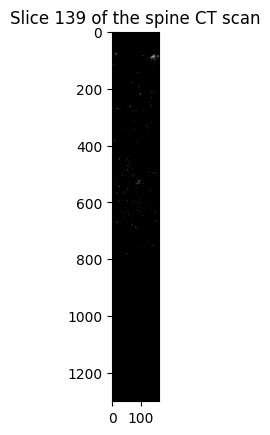

In [4]:
random_slice_spine = np.random.randint(0, cms_spine["all"].shape[0])

# Plot the confidence maps

plt.imshow(images_spine[random_slice_spine], cmap="gray")
plt.title(f"Slice {random_slice_spine} of the spine CT scan")
plt.show()

In [5]:
# Save results for slice 114

image = Image.fromarray((images_spine[114].astype("uint8")).astype("uint8")).resize((images_spine.shape[2] * 4, images_spine.shape[1])).convert("RGB")
image.save("13122023/spine_image.png")

for k, v in cms_spine.items():
    norm_cm = v[114] - np.min(v[114])
    norm_cm = norm_cm / np.max(norm_cm)
    cm = Image.fromarray((norm_cm * 255).astype("uint8")).resize((images_spine.shape[2] * 4, images_spine.shape[1])).convert("RGB")
    cm.save(f"13122023/spine_{k}.png")


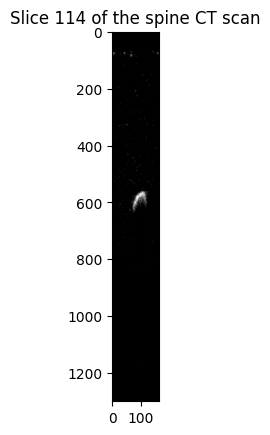

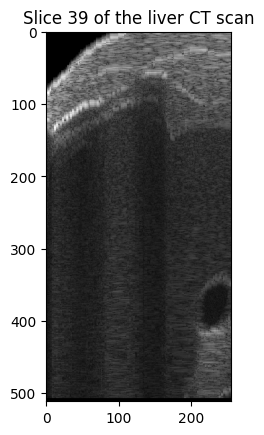

In [6]:
spine_image = images_spine[114]
liver_image = images_liver[39]

plt.imshow(spine_image, cmap="gray")
plt.title(f"Slice 114 of the spine CT scan")
plt.show()

plt.imshow(liver_image, cmap="gray")
plt.title(f"Slice 39 of the liver CT scan")
plt.show()

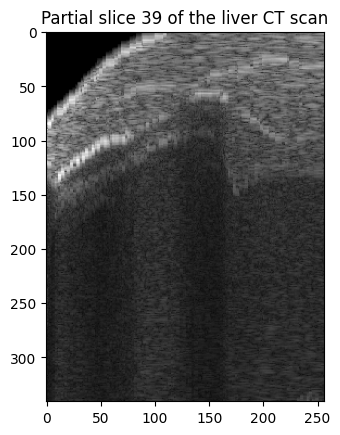

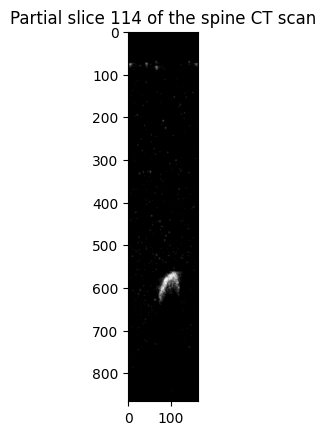

In [7]:
partial_liver = liver_image[:-liver_image.shape[0]//3, :]
partial_spine = spine_image[:-spine_image.shape[0]//3, :]


plt.imshow(partial_liver, cmap="gray")
plt.title(f"Partial slice 39 of the liver CT scan")
plt.show()

plt.imshow(partial_spine, cmap="gray")
plt.title(f"Partial slice 114 of the spine CT scan")
plt.show()

In [8]:
for k, v in cms_liver.items():
    norm_cm = v[39] - np.min(v[39])
    norm_cm = norm_cm / np.max(norm_cm)
    cm = Image.fromarray((norm_cm * 255).astype("uint8")).convert("RGB")
    cm.save(f"13122023/liver_{k}.png")

In [9]:
cm_all = karamalis_cm(sink_mode="all")
cm_mid = karamalis_cm(sink_mode="mid")
cm_min = karamalis_cm(sink_mode="min")

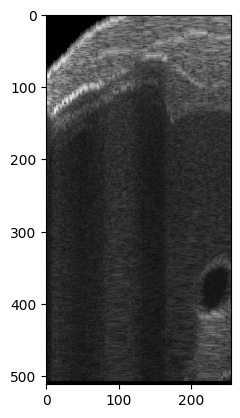

In [10]:
plt.imshow(liver_image, cmap="gray")
plt.show()

In [13]:
liver_all_full = cm_all(liver_image)
liver_mid_full = cm_mid(liver_image)
liver_min_full = cm_min(liver_image)
liver_acyclic_full = acyclic_cm(liver_image)

liver_all_partial = cm_all(partial_liver)
liver_mid_partial = cm_mid(partial_liver)
liver_min_partial = cm_min(partial_liver)
liver_acyclic_partial = acyclic_cm(partial_liver)

spine_all_full = cm_all(spine_image)
spine_mid_full = cm_mid(spine_image)
spine_min_full = cm_min(spine_image)
spine_acyclic_full = acyclic_cm(spine_image)

spine_all_partial = cm_all(partial_spine)
spine_mid_partial = cm_mid(partial_spine)
spine_min_partial = cm_min(partial_spine)
spine_acyclic_partial = acyclic_cm(partial_spine)

c:\Users\Bugra\Desktop\masters-thesis\acyclic_directed_graph\EdgeHistogramSRAD.py:159: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_laplacian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  pyramid = tuple(pyramid_laplacian(sitk.GetArrayFromImage(exp_image), max_layer=3, downscale=2, multichannel=False))
c:\Users\Bugra\Desktop\masters-thesis\acyclic_directed_graph\EdgeHistogramSRAD.py:163: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_expand`. It will be removed in version 1.0. Please use `channel_axis` instead.
  edge = sitk.GetImageFromArray(pyramid_expand(edge, upscale=2 ** 3, multichannel=False))


In [12]:
def save_image(img, path, spine=False):
    img = img - np.min(img)
    img = img / np.max(img)
    img = Image.fromarray((img * 255).astype("uint8")).convert("RGB")
    if spine:
        h = img.size[1]
        w = img.size[0]
        img.resize((w * 4, h)).save(path)
    else:
        img.save(path)

save_image(liver_all_full, "13122023/liver_all_full.png")
save_image(liver_mid_full, "13122023/liver_mid_full.png")
save_image(liver_min_full, "13122023/liver_min_full.png")
save_image(liver_acyclic_full, "13122023/liver_acyclic_full.png")

save_image(liver_all_partial, "13122023/liver_all_partial.png")
save_image(liver_mid_partial, "13122023/liver_mid_partial.png")
save_image(liver_min_partial, "13122023/liver_min_partial.png")
save_image(liver_acyclic_partial, "13122023/liver_acyclic_partial.png")

save_image(spine_all_full, "13122023/spine_all_full.png", spine=True)
save_image(spine_mid_full, "13122023/spine_mid_full.png", spine=True)
save_image(spine_min_full, "13122023/spine_min_full.png", spine=True)
save_image(spine_acyclic_full, "13122023/spine_acyclic_full.png", spine=True)

save_image(spine_all_partial, "13122023/spine_all_partial.png", spine=True)
save_image(spine_mid_partial, "13122023/spine_mid_partial.png", spine=True)
save_image(spine_min_partial, "13122023/spine_min_partial.png", spine=True)
save_image(spine_acyclic_partial, "13122023/spine_acyclic_partial.png", spine=True)

NameError: name 'liver_acyclic_full' is not defined

In [41]:
save_image(liver_image, "13122023/liver_image.png")

In [45]:
test_img = Image.open("karamalis_confidence_map/test.png")

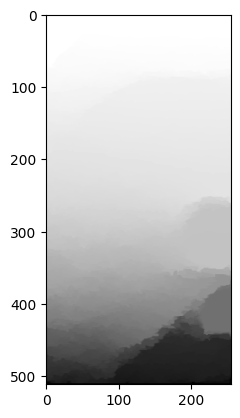

In [46]:
test_img = np.array(test_img)

test_cm = cm_all(test_img)

plt.imshow(test_cm, cmap="gray")
plt.show()

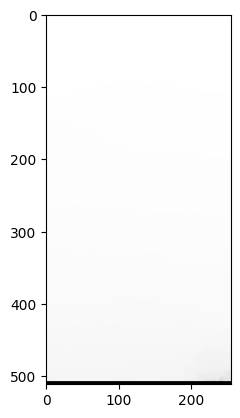

In [42]:
plt.imshow(liver_all_full, cmap="gray")
plt.show()